In [23]:
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
#from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train.shape, x_test.shape

#x_train, y_train = x_train[:10000]

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [25]:
x_train, y_train = x_train[:12000], y_train[:12000]

In [26]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [27]:
x_train.shape, y_train.shape

((12000, 32, 32, 3), (12000, 1))

In [108]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding = 'same', input_shape = x_train.shape[1:]))  # 필터 32개, 필터 크기 3
model.add(Conv2D(32, 3, padding='same', activation='relu'))  # 이미지 크기 똑같이. padding = 'same'
model.add(MaxPooling2D())  # default 2 x 2, 이미지 크기 절반.
model.add(Dropout(0.25))



model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
#model.add(GlobalAveragePooling2D())  # FC 없애려고 도입.
model.add(Dropout(0.35))

model.add(Conv2D(50, 3, padding = 'same', activation = 'relu', strides=(2, 2)))
model.add(Conv2D(50, 4, padding = 'same', activation = 'relu', strides=(3, 3)))
model.add(Conv2D(50, 4, padding = 'same', activation = 'relu', strides=(2, 2)))
model.add(Dropout(0.3))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_146 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_147 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_148 (Conv2D)                  │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_149 (Conv2D)                  │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_150 (Conv2D)                  │ (None, 8, 8, 50)            │          14,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_151 (Conv2D)                  │ (None, 3, 3, 50)            │          40,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_152 (Conv2D)                  │ (None, 2, 2, 50)            │          40,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 2, 2, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 2, 2, 50)            │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,784 (624.16 KB)

 Trainable params: 159,684 (623.77 KB)

 Non-trainable params: 100 (400.00 B)

In [109]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # categorical_crossentropy

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',       # 검증 손실 모니터링
    patience=5,               # 개선되지 않는 에포크를 5번 허용
    restore_best_weights=True) # 최적 가중치 복원

In [110]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32, callbacks=[early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1106 - loss: 2.3302
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1997 - loss: 2.1290
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2223 - loss: 2.0159
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2480 - loss: 1.9255
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2773 - loss: 1.8718
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2946 - loss: 1.8249
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3156 - loss: 1.7867
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3401 - loss: 1.7393
Epoch 9/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3597 - loss: 1.6853
Epoch 10/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3872 - loss: 1.6219
Epoch 11/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4017 - loss: 1.5945
Epoch 12/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4368 - loss: 1.5402
Epoch 13/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

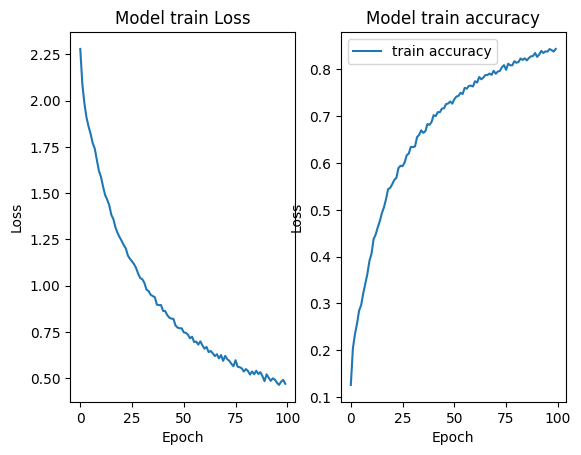

In [111]:
plt.subplot(121)
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model train Loss')

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model train accuracy')

plt.legend()
plt.show()

In [112]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("test_acuuracy: ", test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.6518 - loss: 1.5401
test_acuuracy:  0.6517999768257141
